In [1]:
#data source: https://www.kaggle.com/ronitf/heart-disease-uci

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Other Resources used
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [2]:
# display data
df = pd.read_csv("./heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# See what type of data is stored and if there is any data missing/ null

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


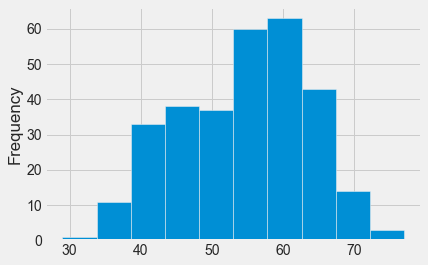

In [4]:
# age sample data
df["age"].plot(kind="hist")

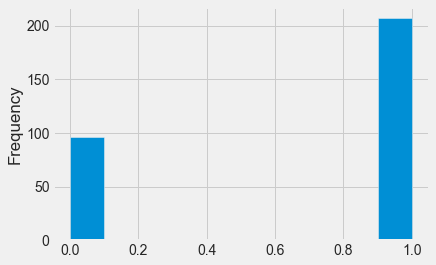

In [5]:
# sex sample data

# 0 = female (96 subjects), 1 = male (207 subjects)
df["sex"].plot(kind="hist")

In [6]:
#Using sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
df_train, df_test = train_test_split(df, test_size=0.15)

In [7]:
print("Data points used for training (out of 303):" + str(len(df_train)))
print("Data points used for testing (out of 303): " + str(len(df_test)))

Data points used for training (out of 303):257
Data points used for testing (out of 303): 46


In [8]:
columns = list(df.columns)
heart_info = columns[0:len(columns)-1]
X_train = df_train[heart_info]

# target: 1 = heart disease present; 0 = not present
y_train = df_train['target']

In [9]:
#Test
X_test = df_test[heart_info]
y_test = df_test['target']

In [10]:
dtc = tree.DecisionTreeClassifier()

In [11]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [12]:
# Prediction
heart_disease_pred = dtc.predict(X_test)
print(list(heart_disease_pred))

[1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1]


In [13]:
#Actual:
print(list(y_test))

[1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1]


In [14]:
print('Training Accuracy: ' + str(accuracy_score(y_test,heart_disease_pred)))
accuracy = accuracy_score(y_test,heart_disease_pred)

Training Accuracy: 0.8260869565217391


In [15]:
while accuracy_score(y_test,heart_disease_pred) < 0.95:
    df_train, df_test = train_test_split(df, test_size=0.15)
    columns = list(df.columns)
    heart_info = columns[0:len(columns)-1]
    X_train = df_train[heart_info]

    # target: 1 = heart disease present; 0 = not present
    y_train = df_train['target']

    #Test
    X_test = df_test[heart_info]
    y_test = df_test['target']

    dtc = tree.DecisionTreeClassifier()
    dtc.fit(X_train, y_train)

    # Prediction
    heart_disease_pred = dtc.predict(X_test)
    print(list(heart_disease_pred))

    #Actual:
    print(list(y_test))

    print('Training Accuracy: ' + str(accuracy_score(y_test,heart_disease_pred)))

[1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1]
Training Accuracy: 0.6739130434782609
[0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0]
[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0]
Training Accuracy: 0.8260869565217391
[1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0]
[0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1]
Training Accuracy: 0.8043478260869565
[0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 